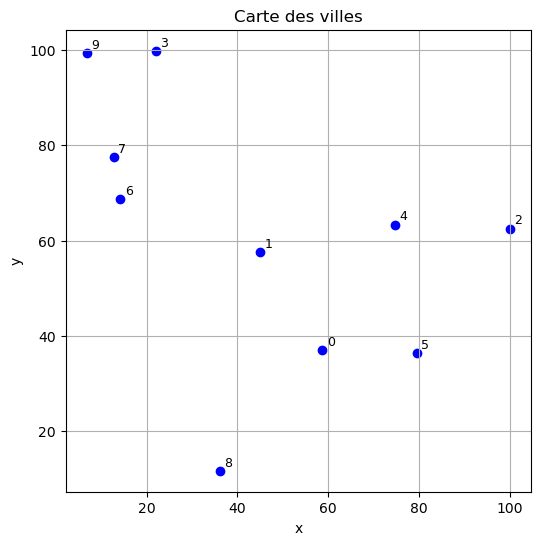

[0.0, 24.728225115279397, 48.55788341055707, 72.73507379360171, 30.809123544477092, 20.871945453005647, 54.53090764946533, 61.22144103115483, 33.92942771214882, 81.0474508708315]
[24.728225115279397, 0.0, 55.26237219180854, 48.079039282332566, 30.24952098771383, 40.58467938744564, 32.61061178439847, 37.8482775937952, 46.75270236581824, 56.509289891568045]
[48.55788341055707, 55.26237219180854, 0.0, 86.36183932307559, 25.362328166818177, 33.22068741107346, 85.92216003132285, 88.47770376814962, 81.64828103706192, 100.07430370025735]
[72.73507379360171, 48.079039282332566, 86.36183932307559, 0.0, 63.969997051928566, 85.63920799903742, 32.183524950094984, 24.225608428556665, 89.33214870463814, 15.178425562797083]
[30.809123544477092, 30.24952098771383, 25.362328166818177, 63.969997051928566, 0.0, 27.45304547716096, 60.58699326943938, 63.45093155807785, 64.46936593876154, 76.68346422740582]
[20.871945453005647, 40.58467938744564, 33.22068741107346, 85.63920799903742, 27.45304547716096, 0.0,

In [29]:
# Import des fonctions utiles
from tsp_utils import generer_villes, afficher_villes, calculer_matrice_distances

# Génération de 10 villes aléatoires
villes = generer_villes(10)

# Affichage des villes sur un plan
afficher_villes(villes)

# Calcul de la matrice des distances euclidiennes
distances = calculer_matrice_distances(villes)

# Affichage de la matrice des distances
for row in distances:
    print(row)


In [30]:
from tsp_utils import generer_villes, calculer_matrice_distances, nearest_neighbor

for n in [10, 20, 50, 100]:
    print(f"\n--- Test avec {n} villes ---")
    villes = generer_villes(n)
    distances = calculer_matrice_distances(villes)
    chemin, total, temps = nearest_neighbor(villes, distances)

    print("Chemin trouvé :", chemin)
    print("Distance totale :", round(total, 2))
    print("Temps d'exécution :", round(temps, 4), "secondes")



--- Test avec 10 villes ---
Chemin trouvé : [0, 6, 9, 4, 2, 1, 5, 7, 8, 3, 0]
Distance totale : 420.5
Temps d'exécution : 0.0 secondes

--- Test avec 20 villes ---
Chemin trouvé : [0, 6, 16, 9, 2, 3, 5, 19, 17, 13, 18, 11, 4, 15, 14, 10, 12, 7, 1, 8, 0]
Distance totale : 417.92
Temps d'exécution : 0.0 secondes

--- Test avec 50 villes ---
Chemin trouvé : [0, 40, 20, 21, 18, 2, 1, 15, 49, 36, 37, 3, 26, 42, 5, 25, 48, 45, 39, 17, 9, 44, 23, 47, 19, 14, 13, 32, 11, 31, 43, 8, 29, 34, 7, 10, 41, 33, 35, 28, 46, 22, 6, 24, 38, 4, 27, 12, 16, 30, 0]
Distance totale : 796.29
Temps d'exécution : 0.0 secondes

--- Test avec 100 villes ---
Chemin trouvé : [0, 29, 47, 50, 24, 62, 48, 13, 11, 56, 42, 88, 73, 51, 28, 14, 67, 60, 20, 58, 80, 9, 85, 27, 30, 89, 36, 38, 15, 68, 37, 87, 64, 39, 8, 21, 75, 31, 10, 23, 25, 93, 6, 18, 12, 43, 49, 2, 16, 95, 41, 3, 81, 7, 45, 1, 55, 94, 33, 59, 53, 40, 91, 70, 26, 63, 71, 44, 97, 19, 34, 66, 52, 61, 79, 17, 78, 92, 65, 5, 57, 4, 83, 90, 96, 22, 99, 32, 6

## Visualisation des solutions

Ci-desouss, les trajets obtenus avec les deux heuristiques implémentées sont affichés :
- En bleu : Plus proche voisin (Nearest Neighbor)
- En vert : Heuristique d’insertion

Les distances totales sont indiquées dans les titres des graphiques.

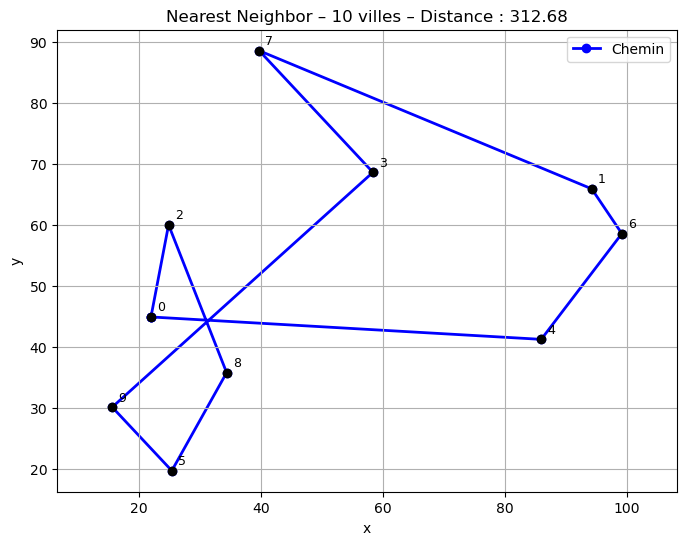

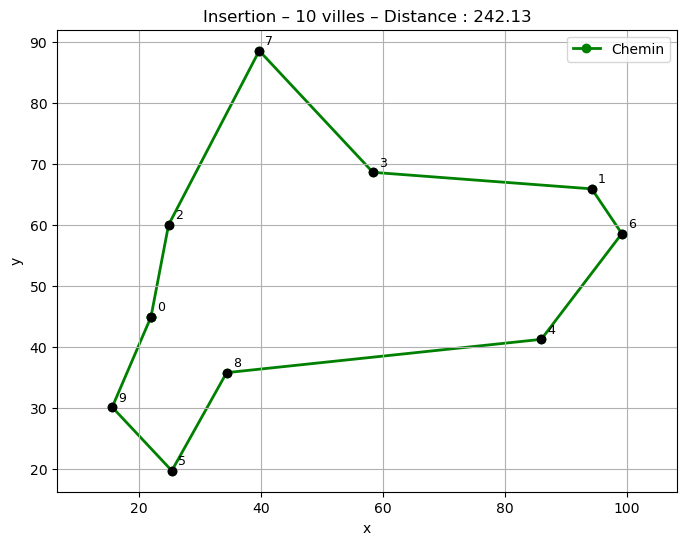

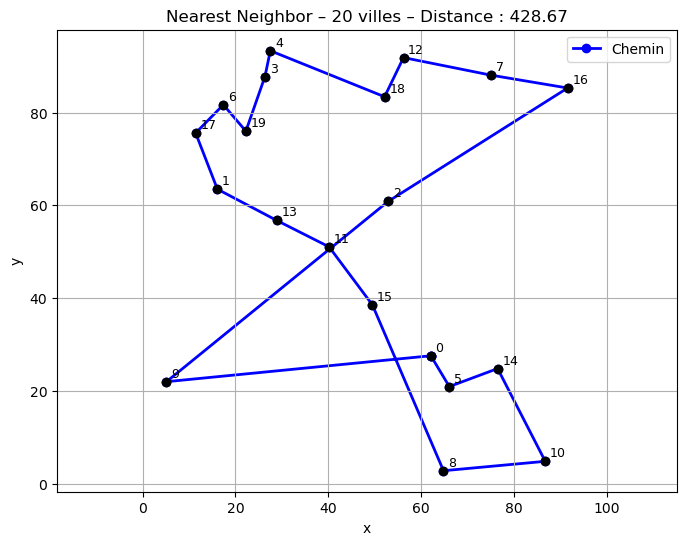

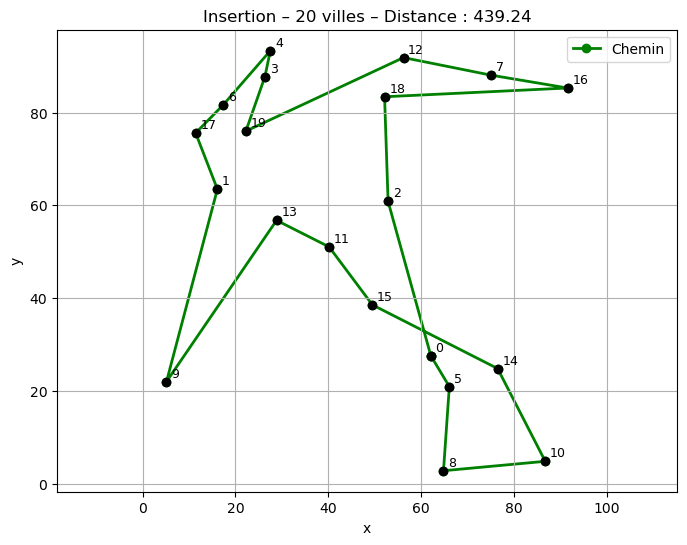

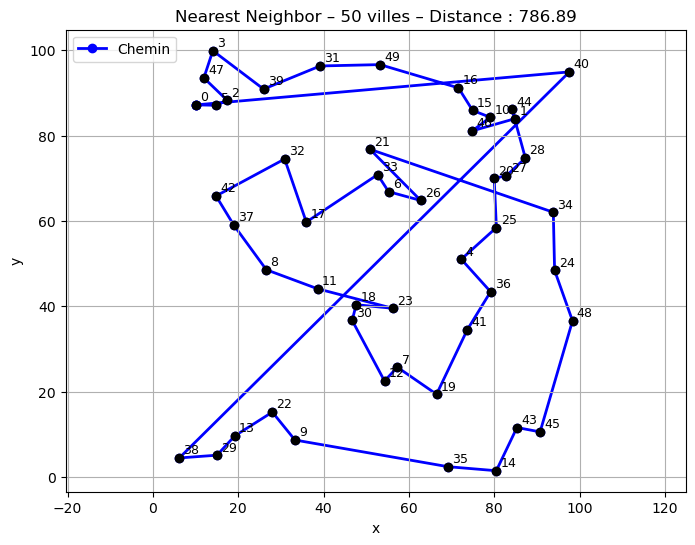

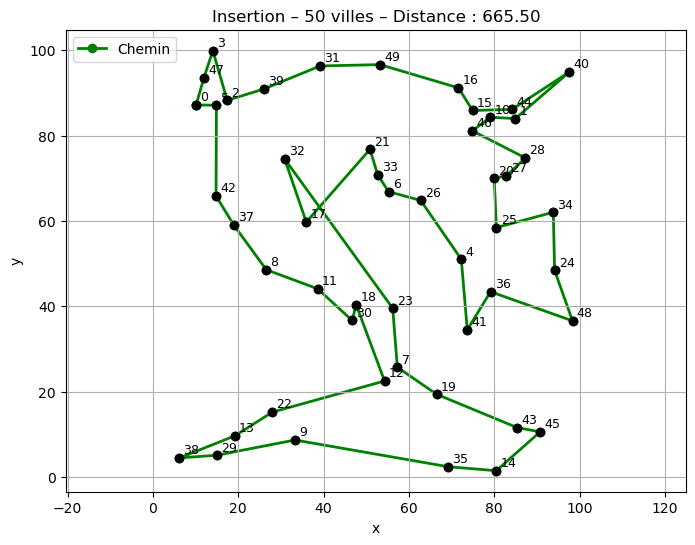

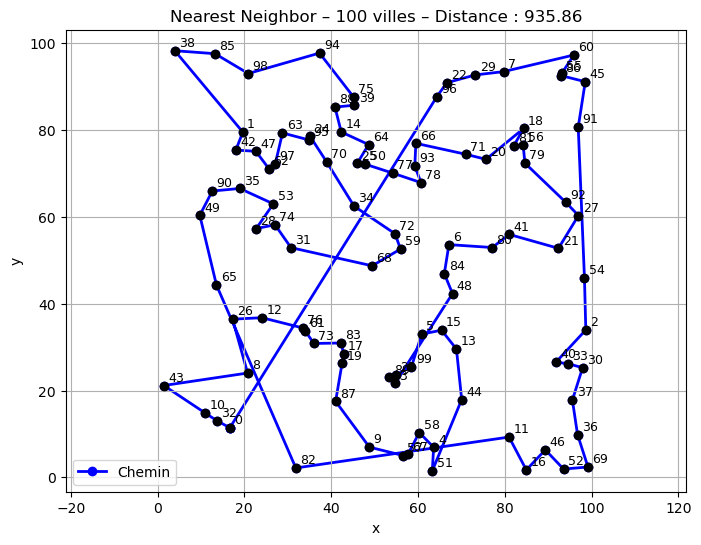

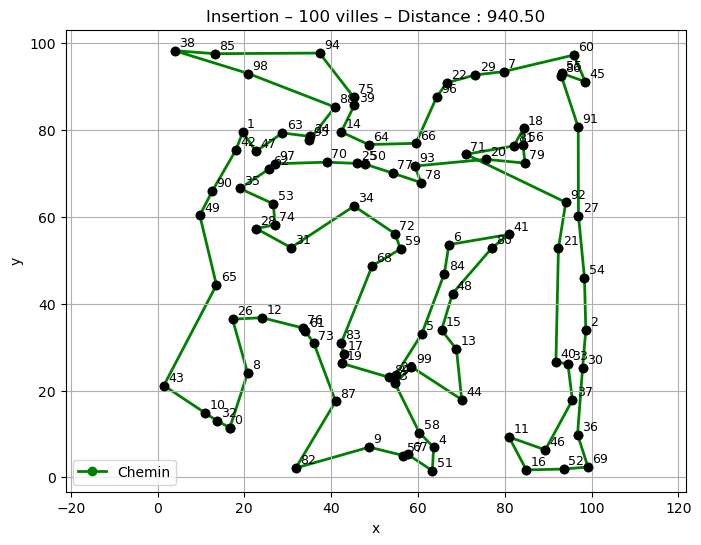

In [31]:
import importlib
import tsp_utils
importlib.reload(tsp_utils)
from tsp_utils import (
    generer_villes,
    calculer_matrice_distances,
    nearest_neighbor,
    insertion_heuristique,
    afficher_chemin
)

for n in [10, 20, 50, 100]:
    villes = generer_villes(n)
    distances = calculer_matrice_distances(villes)
    
    chemin_nn, dist_nn, _ = nearest_neighbor(villes, distances)
    afficher_chemin(villes, chemin_nn, titre=f"Nearest Neighbor – {n} villes", distance=dist_nn)
    
    chemin_ins, dist_ins, _ = insertion_heuristique(villes, distances)
    afficher_chemin(villes, chemin_ins, titre=f"Insertion – {n} villes", couleur="green", distance=dist_ins)